## Part A

In [66]:
#importing packages

import numpy as np   
import pandas as pd 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score   
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(color_codes=True)
%matplotlib inline
from scipy import stats 
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [67]:
df=pd.read_csv("C:\\Users\\91630\\Downloads\\Car name.csv")
df1=pd.read_json ("C:\\Users\\91630\\Downloads\\Car-Attributes.json")
car=pd.concat([df,df1],axis=1)
car.head()

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1

In [68]:
car.shape

(398, 9)

The dataset contains 398 rows and 9 columns

In [69]:
car.describe().transpose()

count         mean         std     min       25%     50%       75%  \
mpg     398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   
cyl     398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp    398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
wt      398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
acc     398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
yr      398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   
origin  398.0     1.572864    0.802055     1.0     1.000     1.0     2.000   

           max  
mpg       46.6  
cyl        8.0  
disp     455.0  
wt      5140.0  
acc       24.8  
yr        82.0  
origin     3.0

1. mpg has mean of 23.5 and standard deviation of 7.8 
2. cyl has a mean of 5.4 and standard deviation of 1.7 
3. disp has a mean of 193.4 and standard deviation of 104.2 
4. wt has a mean of 2970.4 and standard deviation of 846.84
5. acc has a mean of 15.5 and standard deviation of 2.7
6. yr has a mean of 76 and standard deviation of 3.6
7. origin has a mean of 1.5 and standard deviation of 0.8

In [70]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [71]:
# '?' in 'horsepower' 
hpIsDigit = pd.DataFrame(car.hp.str.isdigit()) 
car[hpIsDigit['hp'] == False]  

car_name   mpg  cyl   disp hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0  ?  2046  19.0  71       1
126         ford maverick  21.0    6  200.0  ?  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0  ?  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0  ?  2905  14.3  80       1
354           renault 18i  34.5    4  100.0  ?  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0  ?  3035  20.5  82       1

In [72]:
# Replace ? with NaN
car = car.replace('?', np.nan)
car[hpIsDigit['hp'] == False] 

car_name   mpg  cyl   disp  hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0 NaN  2046  19.0  71       1
126         ford maverick  21.0    6  200.0 NaN  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0 NaN  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0 NaN  2905  14.3  80       1
354           renault 18i  34.5    4  100.0 NaN  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0 NaN  3035  20.5  82       1

In [73]:
miss_val=car.isnull().sum()
print(miss_val)

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64


6 missing values in hp 

In [74]:
miss_per=miss_val/398
miss_per

car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          0.015075
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64

0.015075% of data in hp is missing 
this missing values will be replced by its meadian

In [75]:
car['hp'].fillna((car['hp'].median()), inplace=True)
car.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

there is no missing value 

dropping 'yr','origin','car_name','cyl' columns

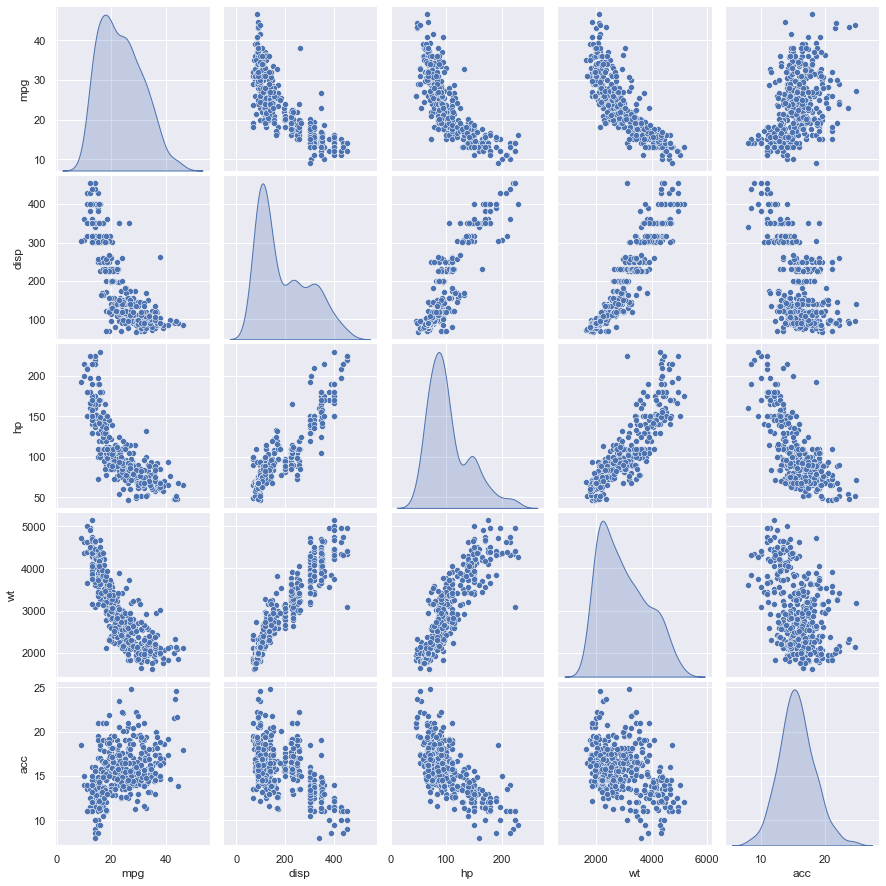

In [76]:
car_num=car.drop(['yr','origin','car_name','cyl'],axis=1)
sns.pairplot(car_num, diag_kind='kde')

1. mpg may have two clusters 
2. mpg and disp have negative corelation
3. mpg and hp have negative corelation
4. mpg and wt have negative corelation
5. the above 3 have same corelation.
6. mpg and acc do not very low corelation

<AxesSubplot:xlabel='wt', ylabel='disp'>

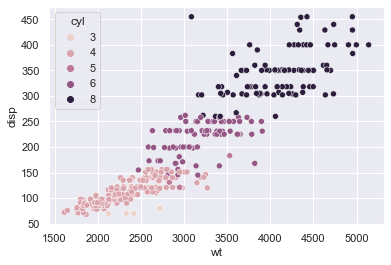

In [77]:
sns.scatterplot(x='wt', y='disp', data=car, hue='cyl')

1. less cylinder has less displacment and less weight.
2. more cylinder has more displacment and more weight.
3. displacement and weight has positive corelation.
4. there are few outliers 

<AxesSubplot:xlabel='wt', ylabel='mpg'>

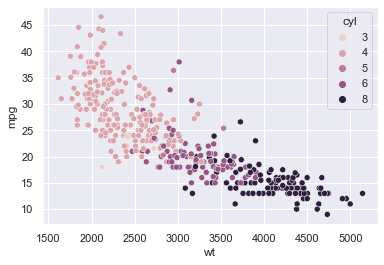

In [78]:
sns.scatterplot(x='wt', y='mpg', data=car, hue='cyl')

1. less cylinder has more mpg and less weight.
2. more cylinder has less mpg and more weight.
3. mpg and weight has negative corelation.
4. there are some outliers.

# Clustering

In [79]:
#for numerical variable
data = car.iloc[:,1:8] 
data.head()

mpg  cyl   disp     hp    wt   acc  yr
0  18.0    8  307.0  130.0  3504  12.0  70
1  15.0    8  350.0  165.0  3693  11.5  70
2  18.0    8  318.0  150.0  3436  11.0  70
3  16.0    8  304.0  150.0  3433  12.0  70
4  17.0    8  302.0  140.0  3449  10.5  70

In [80]:
dataz = data.apply(zscore)
dataz.head()

mpg       cyl      disp        hp        wt       acc        yr
0 -0.706439  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426
1 -1.090751  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426
2 -0.706439  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426
3 -0.962647  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426
4 -0.834543  1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426

In [81]:
#calculating the within sum of squares
wss =[] 
for i in range(2,10):
    KM = KMeans(n_clusters=i)
    KM.fit(dataz)
    wss.append(KM.inertia_)
wss

[1294.8418950727319,
 946.0197908553793,
 738.3923281527312,
 664.8890032028568,
 595.1012606017634,
 541.6206209031756,
 497.07465607265,
 453.93645620194513]

elbow method

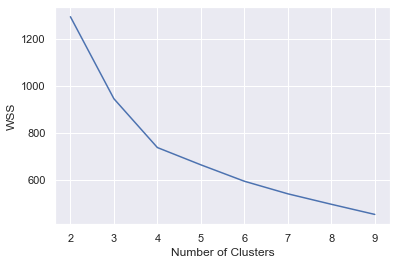

In [82]:
plt.plot(range(2,10), wss);
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

there are two possible elbow : 2 and 4.

In [83]:
#using 4 centroids for clustering
k_means = KMeans(n_clusters = 4)
k_means.fit(dataz)
labels = k_means.labels_
silhouette_score(dataz,labels)

0.3481793333017884

## linear regression

In [84]:
X = car.drop(['mpg','origin','car_name'], axis=1)
y = car[['mpg']]

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [86]:
from sklearn.linear_model import LinearRegression
regmodel = LinearRegression()
regmodel.fit(X_train, y_train)

LinearRegression()

In [88]:
regmodel.score(X_train, y_train)

0.8116062907496024

In [89]:
regmodel.score(X_test, y_test)

0.8003852072685539

# Kmeans clustering

In [90]:
final_model=KMeans(4)
final_model.fit(dataz)
prediction=final_model.predict(dataz)

#Append the prediction 
data["GROUP"] = prediction
dataz["GROUP"] = prediction
print("Groups Assigned : \n")
data.head()

Groups Assigned : 



mpg  cyl   disp     hp    wt   acc  yr  GROUP
0  18.0    8  307.0  130.0  3504  12.0  70      2
1  15.0    8  350.0  165.0  3693  11.5  70      2
2  18.0    8  318.0  150.0  3436  11.0  70      2
3  16.0    8  304.0  150.0  3433  12.0  70      2
4  17.0    8  302.0  140.0  3449  10.5  70      2

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

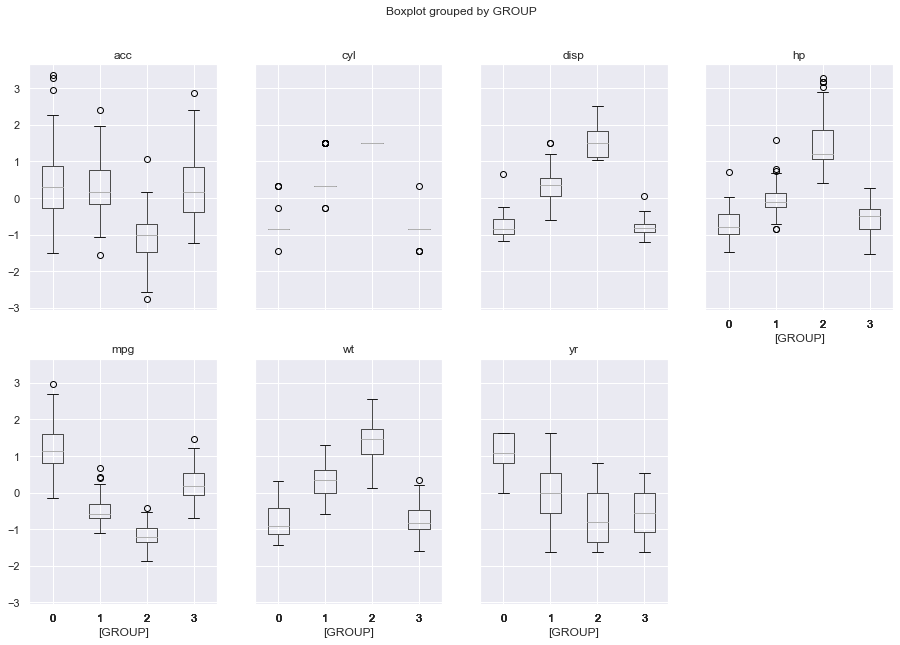

In [91]:
dataz.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# PART B

In [151]:
#import the dataset
df = pd.read_csv("C:\\Users\\91630\\Downloads\\vehicle.csv")
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [152]:
#checking for the dimension of the data
rows, column = df.shape
print('The dataset contains', rows, 'rows and', column, 'columns.')

The dataset contains 846 rows and 19 columns.


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

### null value

In [154]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

there are few missing values 

In [155]:
#replacing the missing values with median values

for cols in df.columns:
    if(cols != 'class'): 
        df[cols] = df[cols].fillna(df[cols].median())

In [156]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

<AxesSubplot:ylabel='None'>

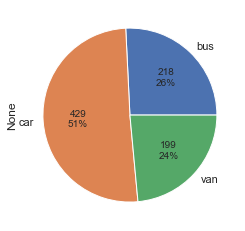

In [157]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

df.groupby('class').size().plot(kind='pie', autopct=label_function)

In [158]:
print('Duplicated rows: ', df[df.duplicated()].shape[0])

Duplicated rows:  0


there is no duplicate rows

In [159]:
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

clf = svm.SVC(gamma=0.025, C=3)  
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [160]:
y_pred = clf.predict(X_test)


In [161]:
#splitting the data to check for correlation with the class variable
X = df.drop(['class'],axis=1)
y = df['class'].astype('category').cat.codes

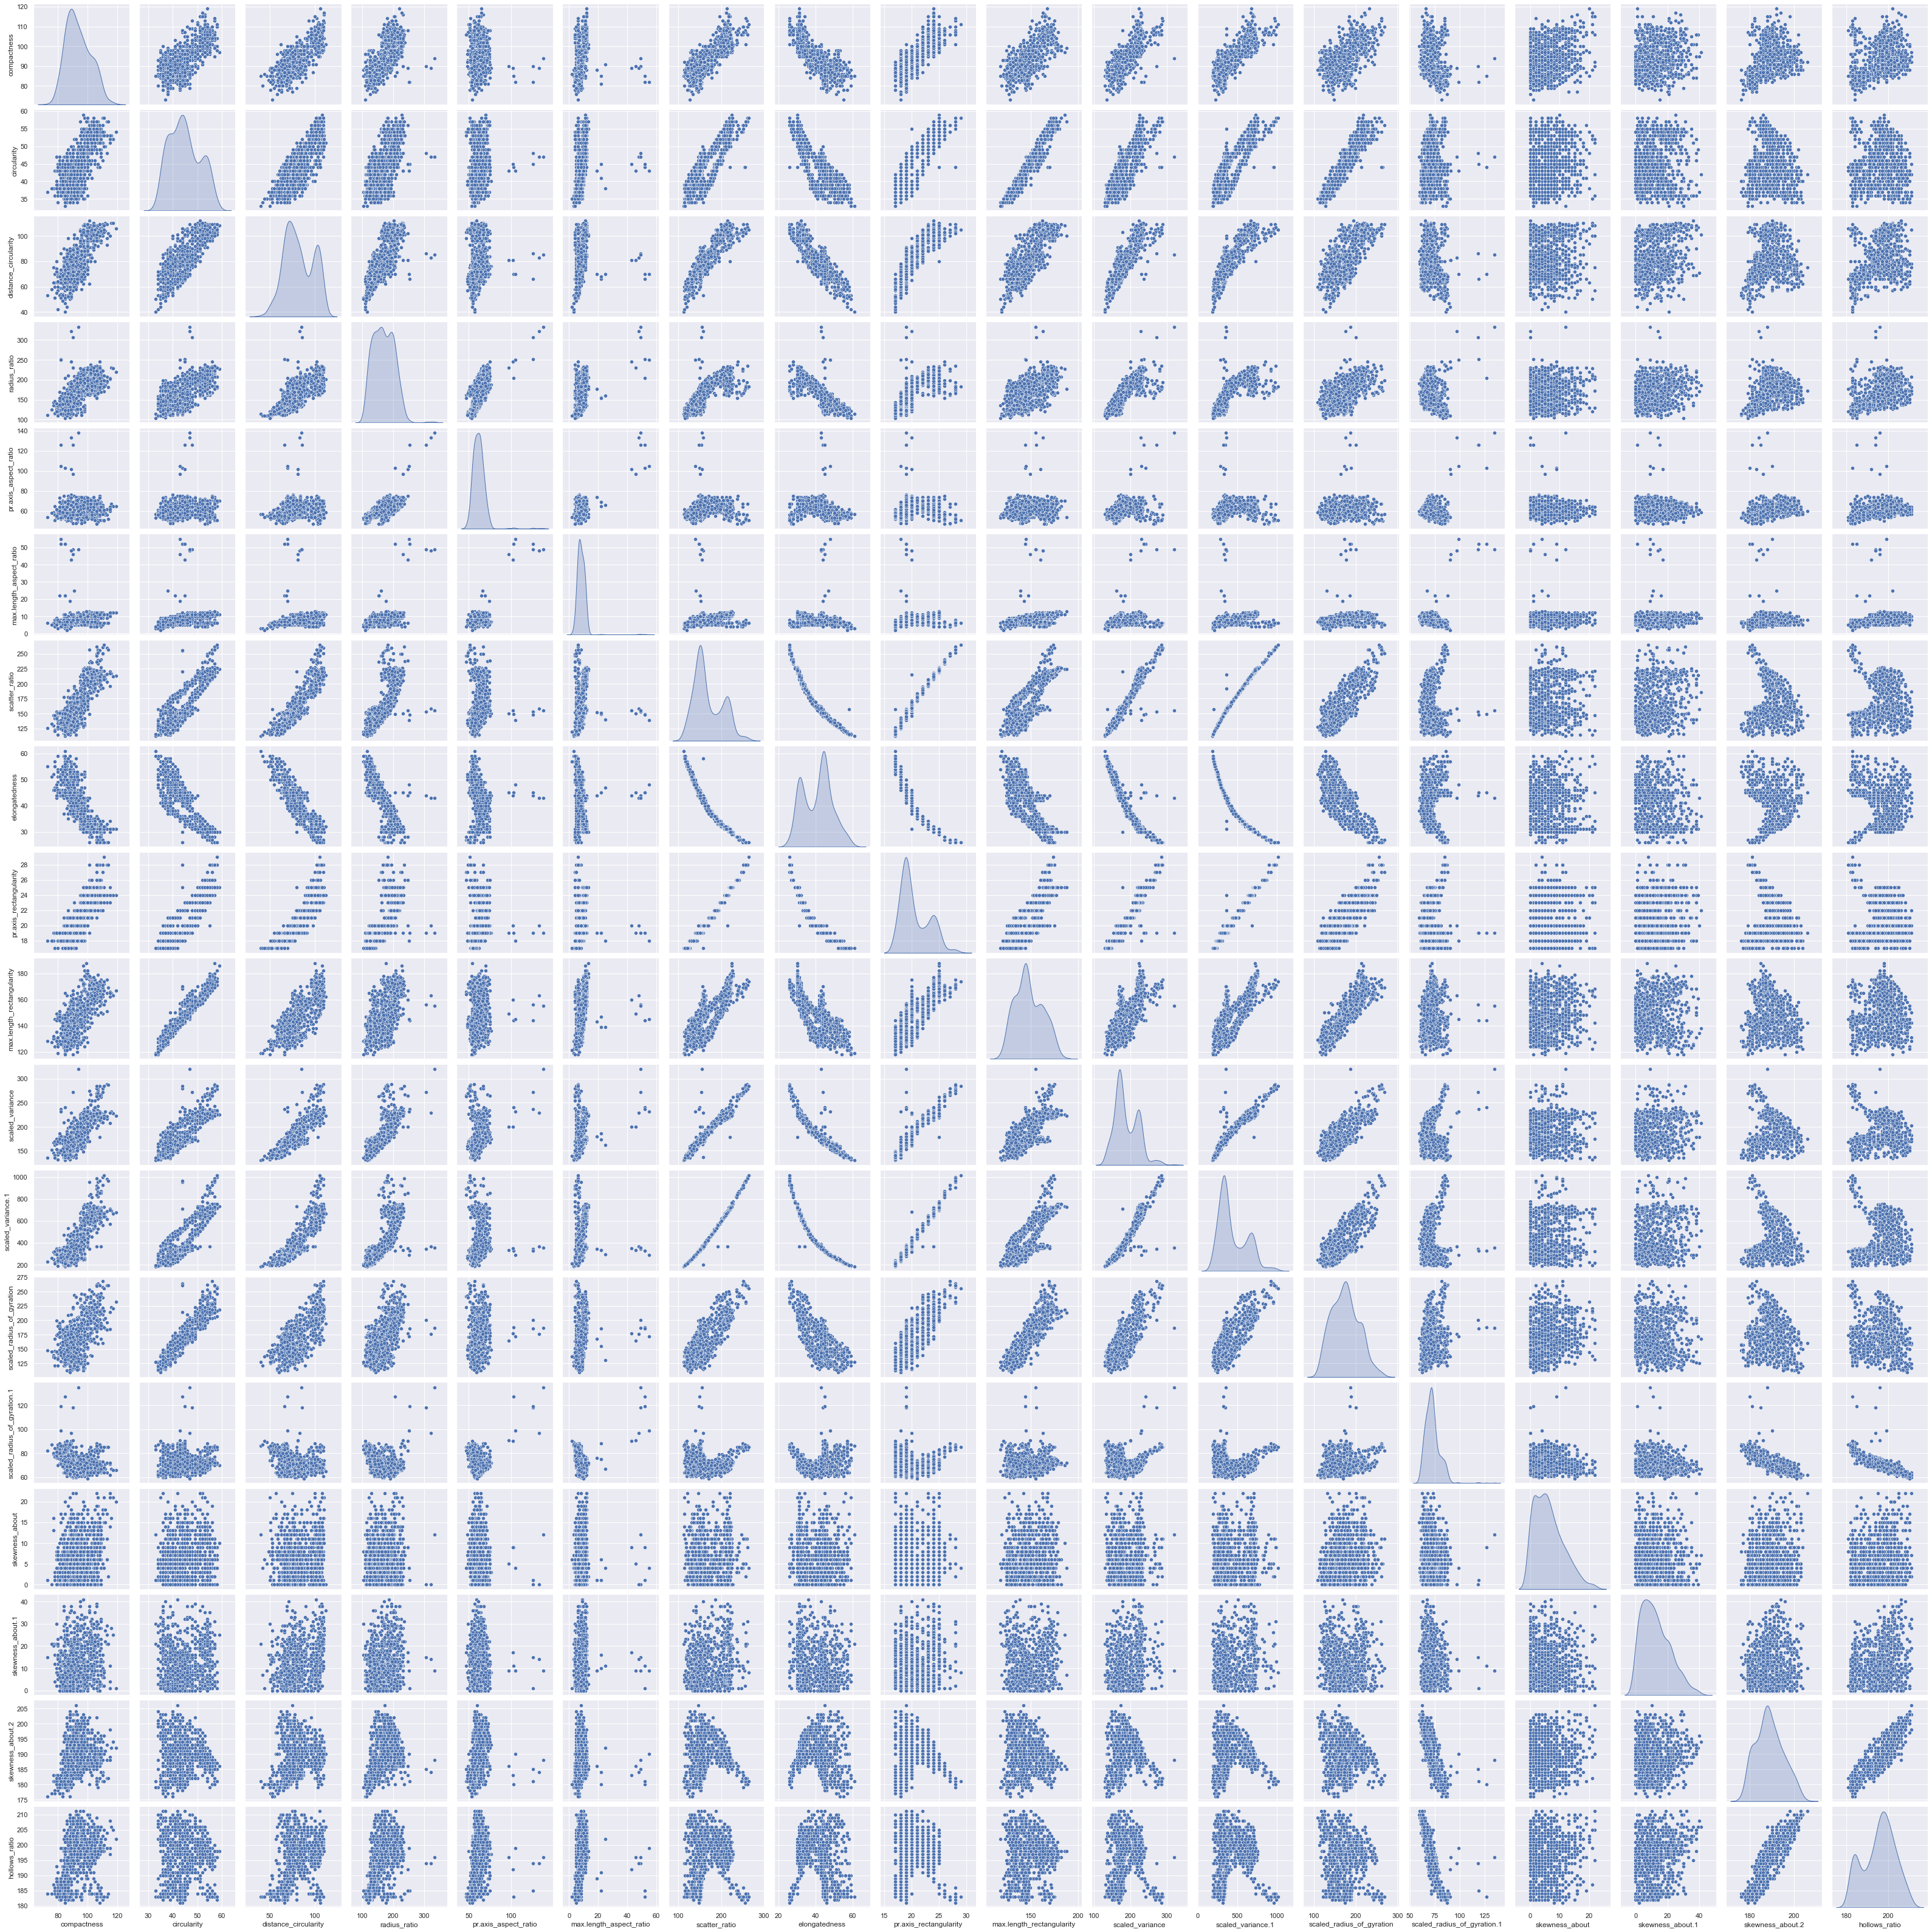

In [162]:
sns.pairplot(X, diag_kind='kde') 

In [163]:
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [164]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [175]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca_ = pca.fit_transform(XScaled)

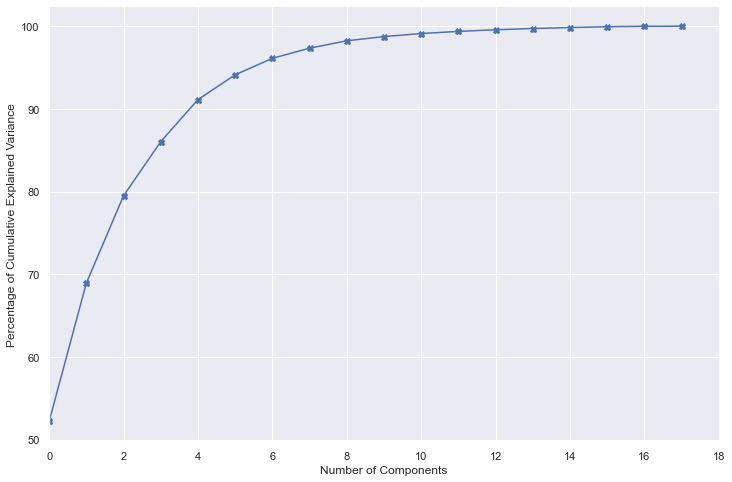

In [176]:
plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance');

In [177]:
print(pca.explained_variance_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


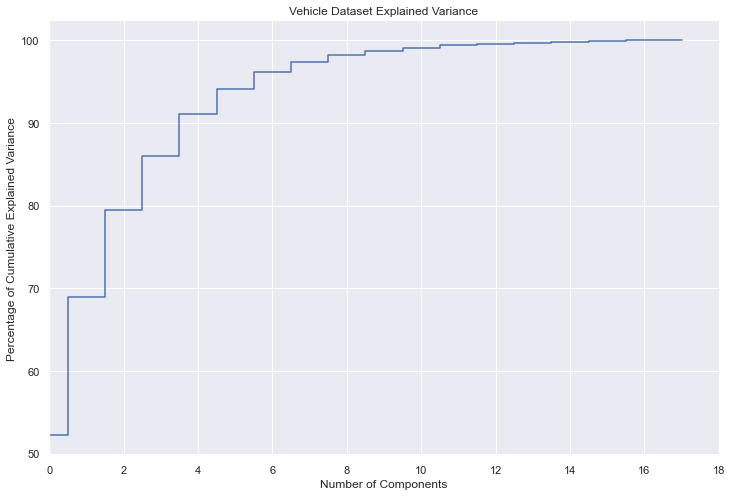

In [178]:
#plotting the line
plt.figure(figsize = (12, 8))
plt.step(list(range(18)), (np.cumsum(pca.explained_variance_ratio_) * 100), where = 'mid')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')
plt.title('Vehicle Dataset Explained Variance');

We can see that the first six components explain more than 95% of variation. Between first 5 components, more than 91% of the information is captured. The above plot shows almost 95% variance by the first 6 components. Therefore we can drop 7th component onwards.

In [180]:
#Using 10 components
pca3 = PCA(n_components=10)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [181]:
#Using 6 components and printing the eigen vectors
pca3 = PCA(n_components=6)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074210e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [182]:
#printing the original features and the reduced features
pca_6 = PCA(n_components = 6)
X_pca = pca_6.fit_transform(XScaled)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 18
Reduced number of features: 6


In [183]:
#viewing the first 5 observations of the pca components
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

0         1          2         3         4         5
0  0.334162 -0.219026   1.001584  0.176612  0.079301 -0.757447
1 -1.591711 -0.420603  -0.369034  0.233234  0.693949 -0.517162
2  3.769324  0.195283   0.087859  1.202212  0.731732  0.705041
3 -1.738598 -2.829692   0.109456  0.376685 -0.362897 -0.484431
4  0.558103  4.758422  11.703647  0.147464  3.256953 -0.203446

### Training SVM

In [185]:
#splitting the original data into train and test 70:30
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 10)

In [186]:
#splitting the pca data into train and test 70:30
X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y, test_size = 0.3, random_state = 10)

In [188]:
# Building a Support Vector Machine on train data
from sklearn.svm import SVC

svc_model = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)

SVC(C=4)

In [190]:
#predicting on train data
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import metrics

sv_train_predict = svc_model .predict(X_train)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_train, sv_train_predict)))
print()

Model Accuracy on train: 0.9899



In [191]:
#predicting on test data
sv_test_predict = svc_model .predict(X_test)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_test, sv_test_predict)))
print()

Model Accuracy on test: 0.9764



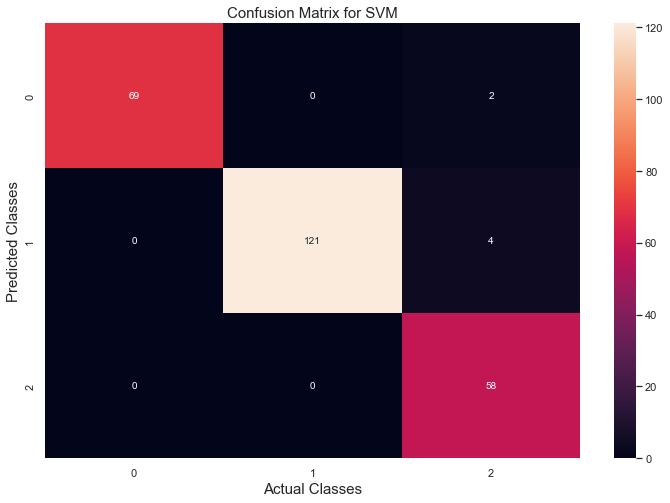

In [194]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_test, sv_test_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [195]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, sv_test_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       1.00      0.97      0.98       125
           2       0.91      1.00      0.95        58

    accuracy                           0.98       254
   macro avg       0.97      0.98      0.97       254
weighted avg       0.98      0.98      0.98       254



In [196]:
#SVM on the pca data
svc_model_pca = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model_pca.fit(X_tr, y_tr)

SVC(C=4)

In [197]:
#predicting on train data
sv_tr_predict = svc_model_pca .predict(X_tr)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_tr, sv_tr_predict)))
print()

Model Accuracy on train: 0.9324



In [198]:
#predicting on test data
sv_te_predict = svc_model_pca .predict(X_te)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_te, sv_te_predict)))
print()

Model Accuracy on test: 0.9134



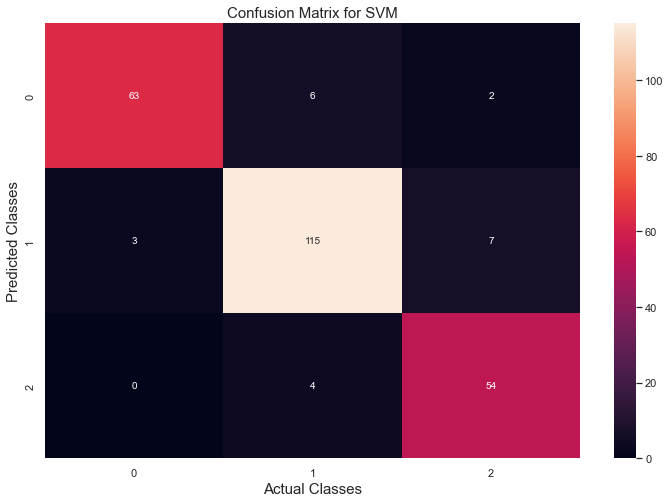

In [199]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_te, sv_te_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [200]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_te, sv_te_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        71
           1       0.92      0.92      0.92       125
           2       0.86      0.93      0.89        58

    accuracy                           0.91       254
   macro avg       0.91      0.91      0.91       254
weighted avg       0.92      0.91      0.91       254



Both the model has more than 90% accuracy on the test data, PCA used only 6 attributes to come up with an accuracy of 90%+ where as the model without pca used all the variables to come up with 90%+ accuracy, the difference can be illustrated even better if the dataset had been cursed with dimensionality, since its 18 variable in the original data the difference is very subtle.